[Home](index.ipynb) > [Data Collections](data_collections.ipynb) > Elite families

<img style='float: left;' src='https://www.gesis.org/fileadmin/styles/img/gs_home_logo_en.svg'>

### ``compsoc`` – *Notebooks for Computational Sociology* (alpha)

# `compsoc` demo: Transactional analysis of socio-cultural systems
Authors: [Haiko Lietz](https://www.gesis.org/person/haiko.lietz)

Please cite as: Lietz, Haiko (2020). compsoc demo: Transactional analysis of socio-cultural systems. *compsoc – Notebooks for Computational Sociology*. GESIS. url:[github.com/gesiscss/compsoc](https://github.com/gesiscss/compsoc)

<div class="alert alert-info">
<big><b>Significance</b></big>

`compsoc` aims at user friendliness. This notebooks demonstrates how far the amount of programming a user needs to know is currently reduced. Core `compsoc` tools for network construction and drawing are applied to three data collections and simple analyses are performed.
</div>

## Dependencies and settings

In [1]:
import compsoc as cs
import networkx as nx
import numpy as np
import pandas as pd

## Elite families data collection
### Data management using dataframes

|<img src='images/data_model.png' style='float: none; width: 460px'>|
|:--|
|<em style='float: center'>**Figure 1**: Unified model for digital behaioral data</em>|

Each data collection has its own notebook where it is decribed and brought into the form of the unified data model (figure 1), if necessary. The elite families collection's notebook is [here](elite_families.ipynb). Collections are loaded by a simple function:

In [2]:
families, parties, relations, domains = cs.elite_families_collection()

Data is managed in `pandas` dataframes because we are used to the rectangular kind of data organization and, once normalized, this form is both efficient and clear. The elite families collection is aggregated into family relationships, i.e., there is no `transactions` table. The `families` table will be used as a **node list** in the step of network construction:

In [3]:
families.head()

,family_id,family,party_id,gross_wealth_mean,date_of_first_prior_mean,block_size,numbers_active_medici,numbers_active_oligarch,numbers_active_neutral,pos_x,pos_y,partisanship_color,status_color
0,0,MEDICI,0,82702,1318,3,7,0,0,-0.0776,0.0391,#387db8,#b6b6b6
1,1,TORNABUONI,0,42840,1303,7,8,1,1,0.0776,0.1251,#5c82b0,#d4d4d4
2,2,GUICCIARDINI,0,40617,1289,5,6,0,0,-0.1761,-0.0705,#387db8,#f1f1f1
3,3,GINORI,0,21167,1344,2,11,0,0,-0.2381,0.1034,#387db8,#818181
4,4,DIETISALVI,0,13137,1340,2,3,0,0,-0.4000,0.1282,#387db8,#898989


Note that data normalization means storing the party in a separate table and linking to it via a `party_id`:

In [4]:
parties

,party_id,party
0,0,Medici
1,1,Oligarch


There are multiplex relations among the families, described in more detail in the notebvook of the [collection](elite_families.ipynb). This dataframe will be used as an **edge list** when constructing the network:

In [5]:
relations.head()

,family_id_from,family_id_to,weight,domain_id
0,0,1,1,0
1,0,23,1,0
2,2,0,1,0
3,3,4,1,0
4,5,3,1,0


Finally, the types of these multiplex ties are described in a separate table:

In [6]:
domains = pd.read_csv('data/elite_families/domains.txt', sep='\t', encoding='utf-8')
domains.head()

,domain_id,domain
0,0,Marriage
1,1,Economic
2,2,Political
3,3,Friendship


### Workflow: From data to network construction, visualization and analysis
#### Network construction
`compsoc` provides functions that can be used in the various staps on an analytical process. First, the `construct_graph()` function, again described in its [own notebook](construct_graph.ipynb), builds networks from data in the normal form. It basically takes a node list and an edge list and lets the user specify **default attributes** for node position, node size, node color, etc. Since the elite families network is supposed to be a directed multiplex graph, set `directed=True` and `multiplex=True`. The node list must be a dataframe in the above form form, i.e., the node identifier must be an integer from 0 to $N-1$ for a graph of $N$ nodes. The edge list must be a dataframe that use these identifiers in the first two columns. The third column must contain an edge weight. If `multiplex=True`, the fourth column must be an integer from 0 to $L-1$ for $L$ network layers or domains. All parameters `node_...` expect as input a column name of the node list. `layer_color` is a dictionary of colors for edge layers. Below we override the default dictionary by custom colors:

In [7]:
G = cs.construct_graph(
    directed=True, 
    multiplex=True, 
    graph_name='elite_families', 
    node_list=families, 
    edge_list=relations, 
    node_pos=['pos_x', 'pos_y'], 
    node_size='gross_wealth_mean', 
    node_color='partisanship_color', 
    node_shape='party_id', 
    node_border_color='status_color', 
    node_label='family', 
    layer_color={0: '#984ea3', 1: '#ff7f00', 2: '#4daf4a', 3: '#a65628'}
)

Get a basic description of the network:

In [8]:
print(nx.info(G))

Name: elite_families
Type: MultiDiGraph
Number of nodes: 33
Number of edges: 86
Average in degree:   2.6061
Average out degree:   2.6061


#### Network visualization
Having constructed the network, the next step is to visualize it. The `draw_graph()` function described [here](draw_graph.ipynb) takes the graph just created and uses the attributes stored in it as default values. Both functions work in tandem. They are part of the `compsoc `backbone. The network uses many attributes: gross wealth for node size, partisanship for node color, status for node border color, edge width for the strength of family relations, and edge color for the tye of tie. Since these attributes are already internalized in the graph object, drawing only requires a fine tuning of sizes:

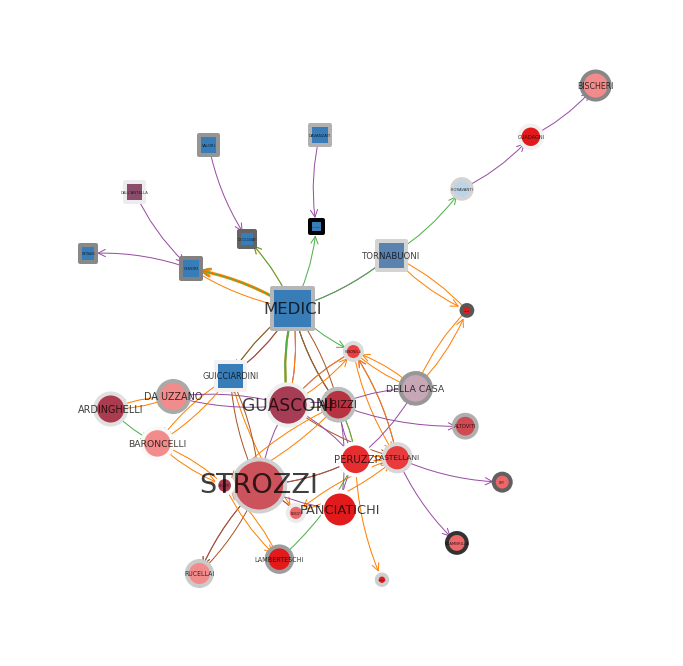

In [9]:
cs.draw_graph(
    G, 
    node_size_factor=0.02, 
    node_border_width=4, 
    curved_edges=True, 
    labels='text', 
    font_size_factor=.0002, 
    label_transparency=.75, 
    figsize='large', 
    png='elite_families'
)

If we want to draw a simpler version of the graph with fewer attributes visualized, we can set the corresponding parameters to `None`:

In [ ]:
cs.draw_graph(
    G, 
    node_size=None, 
    node_size_factor=.3, 
    node_color=None, 
    node_shape=None, 
    node_border_color=None, 
    node_border_width=1, 
    edge_width=None, 
    edge_color=None, 
    figsize='medium'
)

#### Network analysis
The elite families graph has often been used to teach centrality analysi, i.e., the analysis of nodes in terms of a atructural ranking. The way `compsoc` is contructed, all we need to do is to plug the respective centrality score into the parameter for node size. We see, e.g., that the Medici family is both central in terms of being **close** to all other families in the power game...

In [ ]:
cs.draw_graph(
    G, 
    node_size=nx.closeness_centrality(G), 
    node_size_factor=2500, 
    node_border_color=None, 
    curved_edges=True, 
    labels='text', 
    font_size=None, 
    label_transparency=.75, 
    figsize='large', 
    png='elite_families'
)

... as well as most central in terms of being **between** other families:

In [ ]:
cs.draw_graph(
    G, 
    node_size=nx.betweenness_centrality(nx.DiGraph(G)), 
    node_size_factor=2500, 
    node_border_color=None, 
    curved_edges=True, 
    labels='text', 
    font_size=None, 
    label_transparency=.75, 
    figsize='large', 
    png='elite_families'
)

## Copenhagen Networks Study data collection
The Copenhagen Networks Study [collection](copenhagen.ipynb) is one of the premier datasets in the realm of digital behavioral data because it contains four types of relations among 845 university students. Bringing it into the standard form already takes some effort, but this is done when we load the dataset:

In [ ]:
users, genders, bluetooth, calls, sms, facebook_friends = cs.copenhagen_collection()

As with the elite families collection there is no transactions table of transactions. Certainly calls and short messages are transactions with a sender, a receiver, and a content, but storing data as simple relations among users is preferred because there are no metadata of the transactions.

In principle, it would be possible to construct a multiplex graph from the **four types of tie**. But this step needs care because the four layers operate no **different time scales**. Bluetooth user proximity is measured every 5 minutes, users make 0.15 calls per day on average, they send 1 text message per day on average, and the Facebook friendship network is a static snapshot at the end of the 4 week observation period. Therefore, we construct the networks layer by layer. These steps require that a `compsoc` user has basic knowledge how to preprocess dataframes in `pandas`.
### Network construction and visualization
#### Network of physical proximity
Preprocess data (extract day 1):

In [ ]:
bluetooth_preprocessed = bluetooth[bluetooth['day'] == 0]
bluetooth_preprocessed = bluetooth_preprocessed[['user_id_from', 'user_id_to', 'strength']].groupby(['user_id_from', 'user_id_to']).max().reset_index()

Construct graph:

In [ ]:
H_bluetooth_preprocessed = cs.construct_graph(
    directed=False, 
    multiplex=False, 
    graph_name='bluetooth_preprocessed', 
    node_list=users, 
    edge_list=bluetooth_preprocessed, 
    node_color='gender_id', 
    node_label='user'
)

Draw graph with periphery removed:

In [ ]:
cs.draw_graph(
    H_bluetooth_preprocessed.subgraph(max(nx.connected_components(nx.to_undirected(H_bluetooth_preprocessed)))), 
    edge_color='#e41a1c', 
    edge_width_factor=.05
)

#### Network of phone calls
Preprocess data:

In [ ]:
calls_preprocessed = calls[['user_id_from', 'user_id_to', 'duration']].groupby(['user_id_from', 'user_id_to']).sum().reset_index()
calls_preprocessed = calls_preprocessed[calls_preprocessed['duration'] > 1]
calls_preprocessed.loc[:, 'duration_log'] = np.log10(calls_preprocessed['duration'])
calls_preprocessed = calls_preprocessed[['user_id_from', 'user_id_to', 'duration_log']]

Construct graph:

In [ ]:
H_calls_preprocessed = cs.construct_graph(
    directed=True, 
    multiplex=False, 
    graph_name='calls_preprocessed', 
    node_list=users, 
    edge_list=calls_preprocessed, 
    node_color='gender_id', 
    node_label='user'
)

Draw graph with periphery removed:

In [ ]:
cs.draw_graph(
    H_calls_preprocessed.subgraph(max(nx.connected_components(nx.to_undirected(H_calls_preprocessed)), key=len)), 
    edge_color='#377eb8'
)

#### Network of text messages
Preprocess data:

In [ ]:
sms_preprocessed = sms.groupby(['user_id_from', 'user_id_to']).size().reset_index()
sms_preprocessed.rename(columns={0: 'size'}, inplace=True)
sms_preprocessed = sms_preprocessed[sms_preprocessed['size'] > 1]
sms_preprocessed.loc[:, 'size_log'] = np.log10(sms_preprocessed['size'])
sms_preprocessed = sms_preprocessed[['user_id_from', 'user_id_to', 'size_log']]

Construct graph:

In [ ]:
H_sms_preprocessed = cs.construct_graph(
    directed=True, 
    multiplex=False, 
    graph_name='sms_preprocessed', 
    node_list=users, 
    edge_list=sms_preprocessed, 
    node_color='gender_id', 
    node_label='user'
)

Draw graph with periphery removed:

In [ ]:
cs.draw_graph(
    H_sms_preprocessed.subgraph(max(nx.connected_components(nx.to_undirected(H_sms_preprocessed)), key=len)), 
    edge_color='#4daf4a'
)

#### Network of Facebook friendships
Preprocess data:

In [ ]:
facebook_friends['weight'] = 1

In [ ]:
H_facebook_friends = cs.construct_graph(
    directed=False, 
    multiplex=False, 
    graph_name='facebook_friends', 
    node_list=users, 
    edge_list=facebook_friends, 
    node_color='gender_id', 
    node_label='user'
)

Construct graph:

In [ ]:
cs.draw_graph(
    H_facebook_friends.subgraph(max(nx.connected_components(nx.to_undirected(H_facebook_friends)), key=len)), 
    node_color=None, 
    edge_width_factor=.2, 
    edge_color='#984ea3'
)

### Network analysis
Since there is a gender attribute, we may want to know if, for example, there are signs of homophily in these graphs, i.e., if users tend to connect with those of the same gender. A simple measure (that would need to be adjusted for size differences) is the assortativity coefficient:

In [ ]:
print('bluetooth: ', nx.attribute_assortativity_coefficient(H_bluetooth_preprocessed, 'node_color'))
print('calls: ', nx.attribute_assortativity_coefficient(H_calls_preprocessed, 'node_color'))
print('sms: ', nx.attribute_assortativity_coefficient(H_sms_preprocessed, 'node_color'))
print('facebook_friends: ', nx.attribute_assortativity_coefficient(H_facebook_friends, 'node_color'))